In [848]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [849]:

df = pd.read_csv('https://raw.githubusercontent.com/mn42899/schulich_data_science/main/Dataset.csv')
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,Yes
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,No
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,No
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,No


In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [851]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

In [852]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [853]:
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

att_df = df[df['Attrition'] == 1]

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_24170/926704965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})


In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [855]:
#14.03% of the dataset is Attritioned (1403 rows)
att_df.value_counts().reset_index()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,count
0,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1,1
1,6630,29,Male,Technician,Support,5312,18,0,8.583486,17.356377,3,3,1,1
2,6683,44,Female,Manager,Sales,10920,13,0,9.329743,28.922099,3,2,1,1
3,6676,57,Female,HR,Sales,3456,16,3,17.879216,35.859275,5,2,1,1
4,6673,50,Male,Manager,HR,3020,6,4,2.872676,50.000000,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,3329,59,Female,HR,Engineering,14699,0,0,6.567386,43.484003,2,2,1,1
1399,3320,56,Male,Manager,Sales,14602,13,4,13.283897,25.255019,5,1,1,1
1400,3314,32,Female,HR,Engineering,6533,22,3,13.479548,29.696803,3,3,1,1
1401,3308,50,Female,Sales,IT,3129,12,0,18.943954,50.000000,3,1,1,1


<Axes: xlabel='Age', ylabel='Count'>

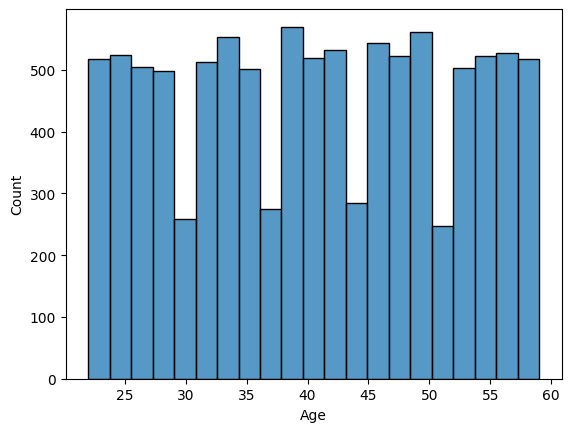

In [856]:
#Age check
sns.histplot (x=df['Age'])

<Axes: xlabel='Attrition', ylabel='Count'>

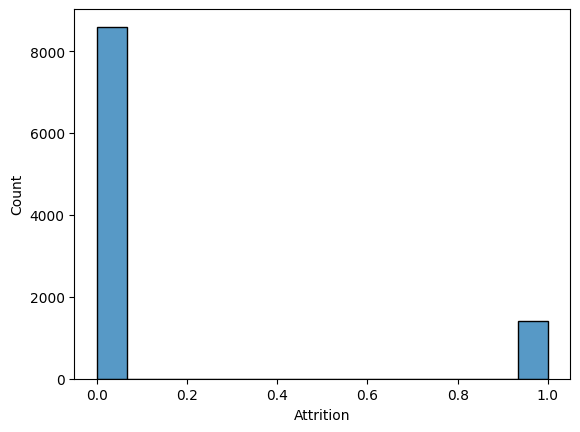

In [857]:
#Check distribution on Attrition 
sns.histplot(x=df['Attrition'])

<Axes: xlabel='Attrition', ylabel='Age'>

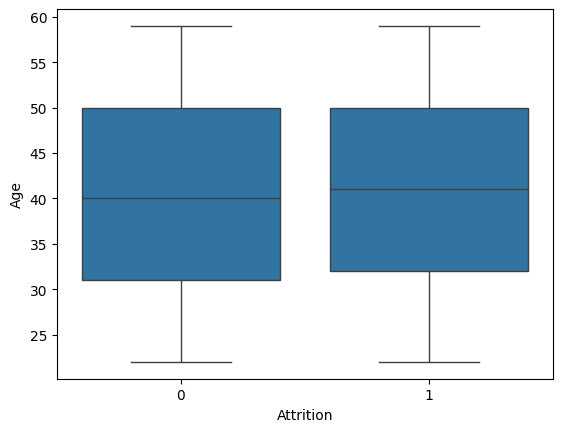

In [858]:
sns.boxplot(x='Attrition', y='Age', data=df)

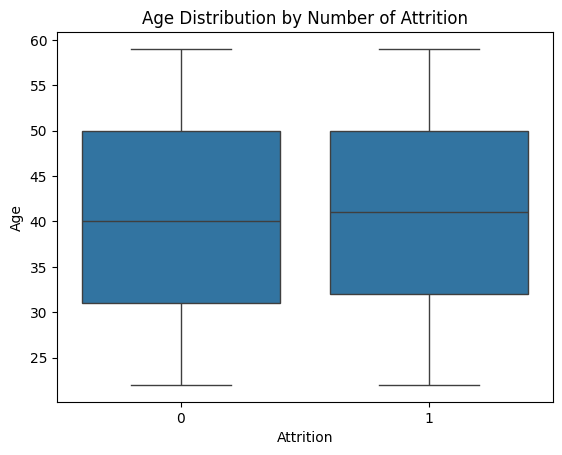

In [859]:
#No big difference in attrition based on age 

sns.boxplot(x='Attrition', y='Age', data=df)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Age Distribution by Number of Attrition')
plt.show()

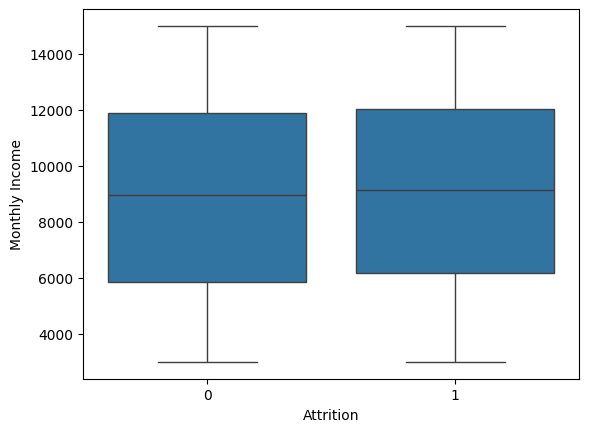

In [860]:
sns.boxplot(x= 'Attrition', y=df['Monthly Income'], data=df)
plt.show()

In [861]:
ages = df.groupby('Age')
ages.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,31,Male,Manager,Engineering,5525,12,2,16.969743,11.364353,7,3,0
390,391,52,Male,Engineer,IT,4609,25,3,11.033344,15.786949,7,3,0
391,392,31,Female,Engineer,Sales,8443,13,0,4.197570,2.390778,7,5,0
415,416,31,Female,Engineer,Sales,4382,12,1,14.686141,15.601300,10,1,0


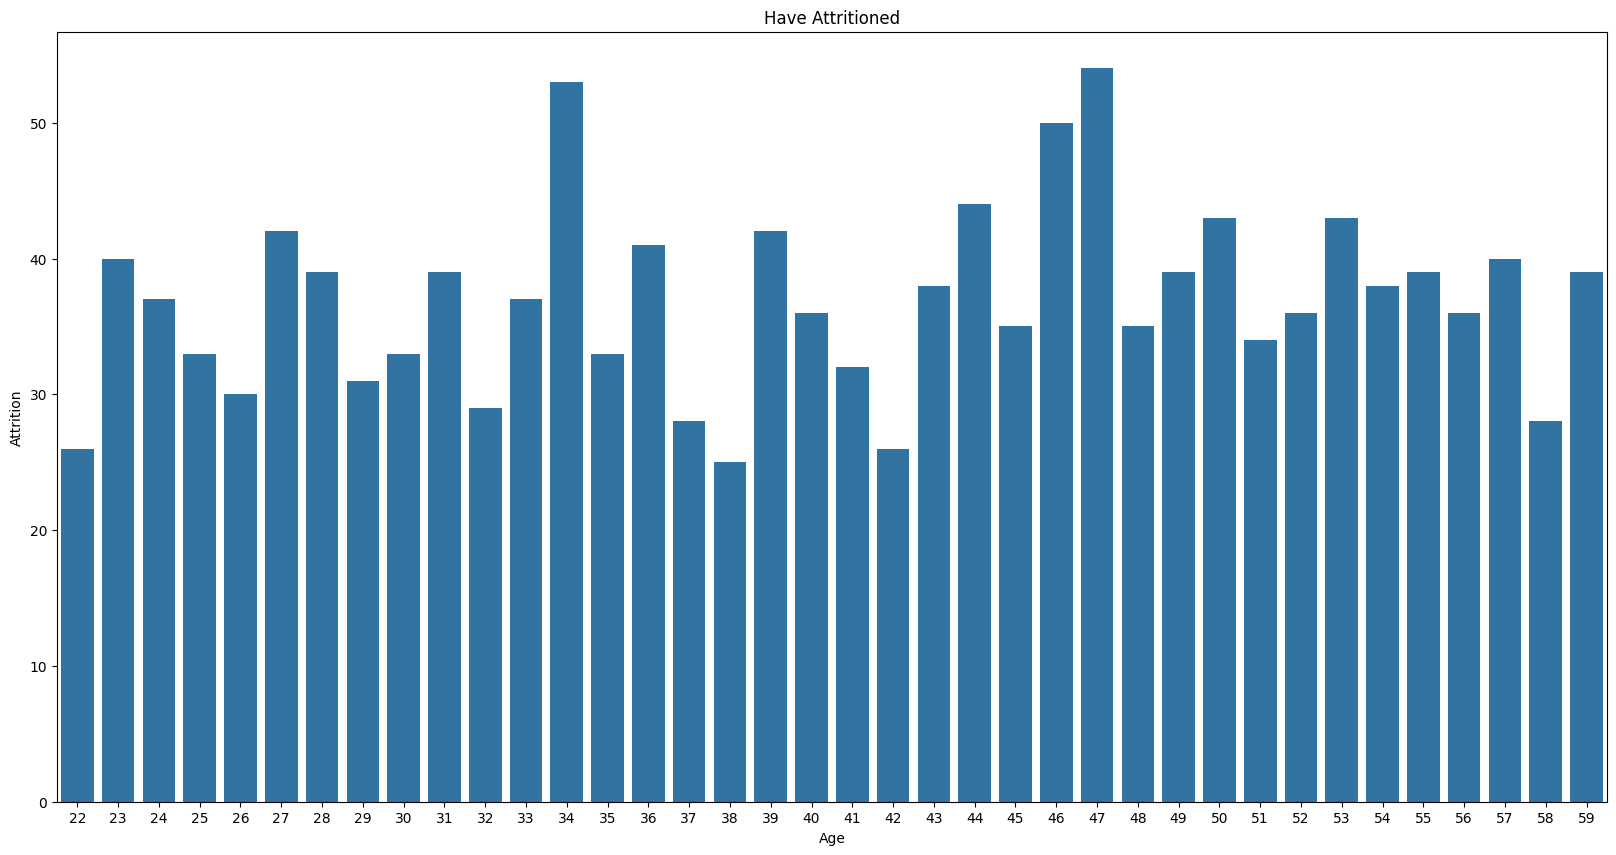

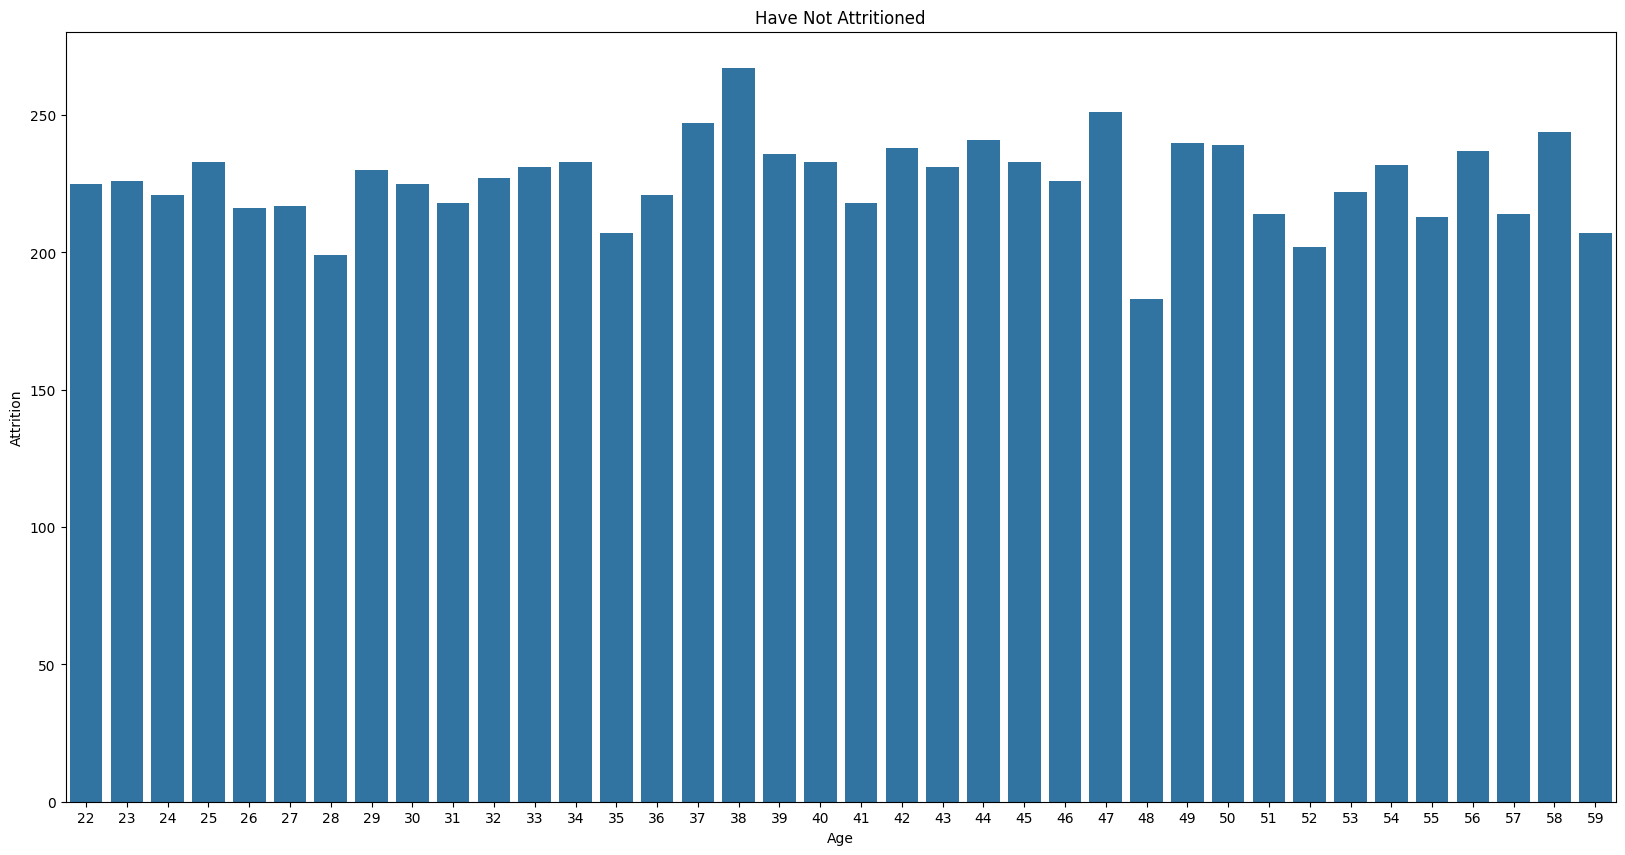

In [862]:
#No Apparent patterns in ditributions


plt.figure(figsize=(20,10))
sns.barplot(x=ages['Attrition'].sum().index, y=ages['Attrition'].sum())
plt.title("Have Attritioned")
plt.show()

noAtt = df[df['Attrition'] == 0]
noAttAge = noAtt.groupby('Age')

plt.figure(figsize=(20,10))
sns.barplot(x=noAttAge['Attrition'].count().index, y=noAttAge['Attrition'].count())
plt.title("Have Not Attritioned")
plt.show()

In [863]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

<Axes: xlabel='Attrition', ylabel='Performance Rating'>

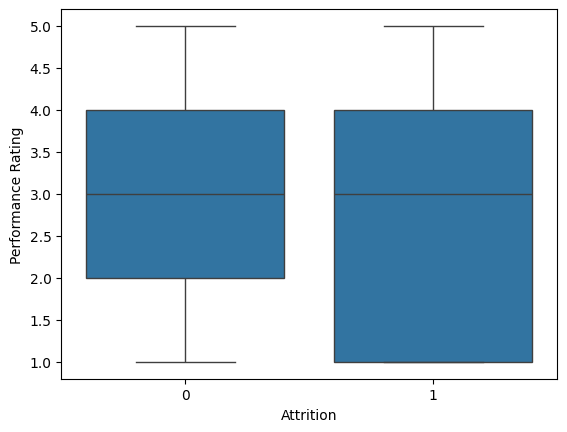

In [864]:
#Median is the same, users who have attributed have lower performance ratings
sns.boxplot(x='Attrition', y='Performance Rating', data=df)

<Axes: xlabel='Attrition', ylabel='Years at Company'>

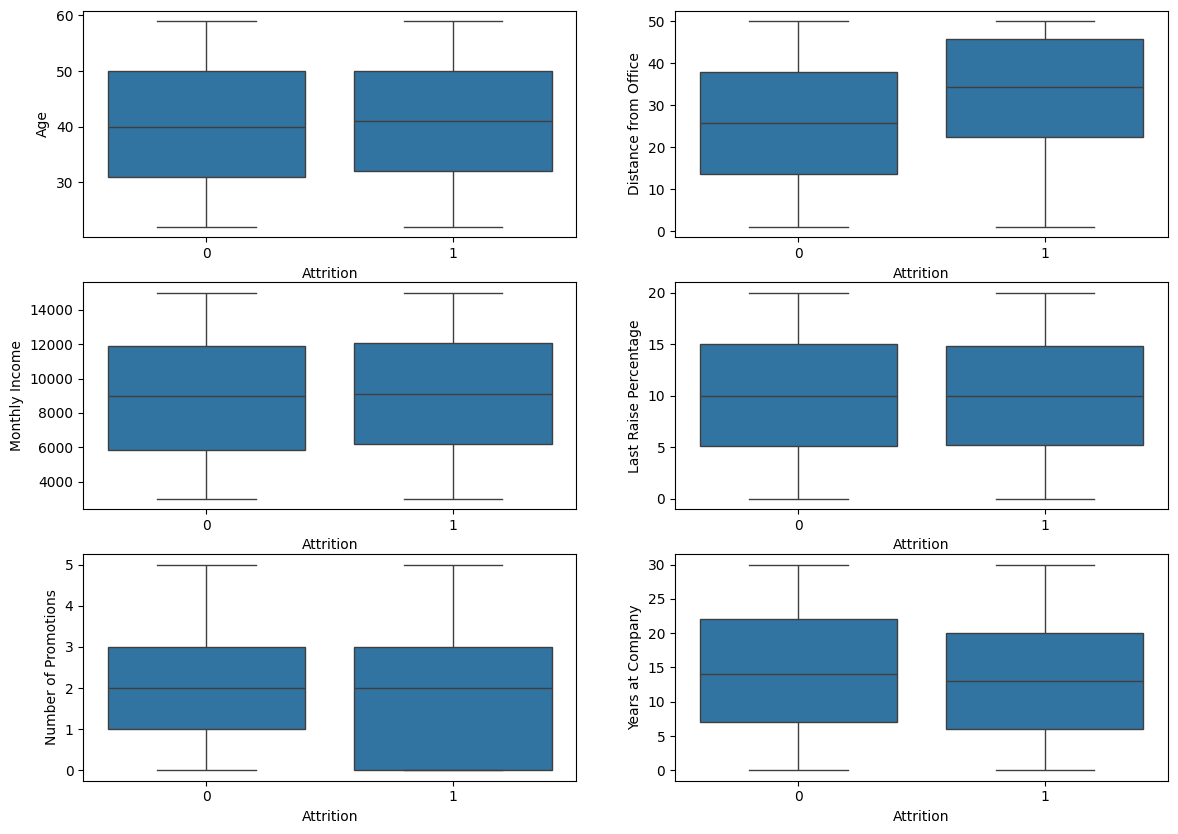

In [865]:
## data exploration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(14,10))
sns.boxplot(x='Attrition', y='Age', data=df, ax=ax1)
sns.boxplot(x='Attrition', y='Distance from Office', data=df, ax=ax2)
sns.boxplot(x='Attrition', y='Monthly Income', data=df, ax=ax3)
sns.boxplot(x='Attrition', y='Last Raise Percentage', data=df, ax=ax4)
sns.boxplot(x='Attrition', y='Number of Promotions', data=df, ax=ax5)
sns.boxplot(x='Attrition', y='Years at Company', data=df, ax=ax6)


#Can mainly observe those who have attritioned had to commute longer distances

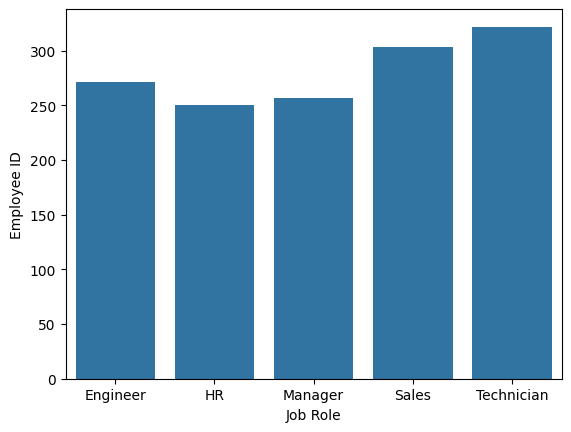

In [866]:
#Create # of Attrition count based on Job Role
loc = att_df.groupby('Job Role')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())
plt.show()

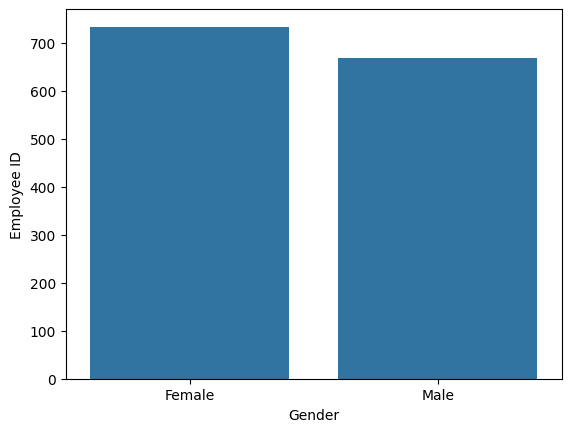

In [867]:
#Create # of Attrition count based on Gender
loc = att_df.groupby('Gender')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())
plt.show()

In [868]:
att_df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.0
mean,4971.591589,40.902352,9099.886671,13.067712,1.735567,9.997341,32.480038,4.751960,2.734854,1.0
std,2906.587663,10.845551,3452.367849,8.684540,1.363602,5.738883,14.109988,2.858988,1.382426,0.0
min,2.000000,22.000000,3002.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,2445.500000,32.000000,6176.000000,6.000000,0.000000,5.213532,22.348855,2.000000,1.000000,1.0
50%,4950.000000,41.000000,9122.000000,13.000000,2.000000,9.927292,34.346259,4.000000,3.000000,1.0
75%,7494.000000,50.000000,12045.000000,20.000000,3.000000,14.836217,45.686204,7.000000,4.000000,1.0
max,9996.000000,59.000000,14997.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000,1.0


In [869]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,5027
1,Male,4973


In [870]:
df['Number of Promotions'].value_counts().reset_index()

,Number of Promotions,count
0,0,2104
1,3,2039
2,1,2027
3,2,1993
4,4,1732
5,5,105


In [871]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,1
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,0
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,0
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,0


Attrition(Original Features):
Distance from Office     0.164096
Monthly Income           0.017579
Age                      0.012672
Last Raise Percentage   -0.001766
Employee ID             -0.004045
Years at Company        -0.057457
Number of Promotions    -0.063094
Performance Rating      -0.073892
Job Satisfaction        -0.089904
Name: Attrition, dtype: float64


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_24170/757433625.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')


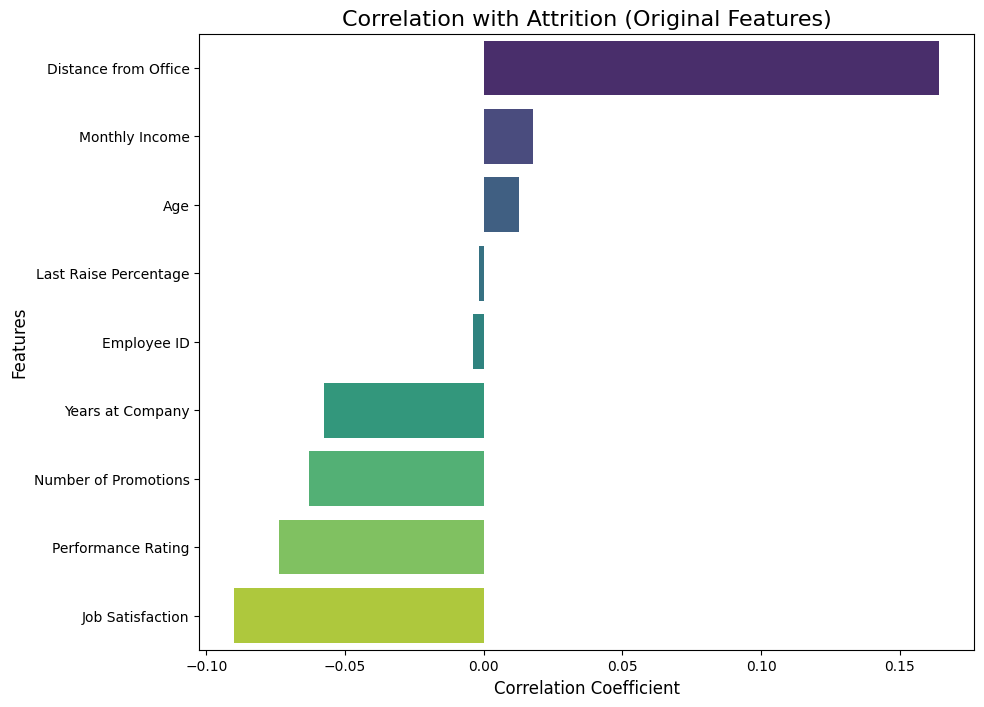

In [872]:
#Should I do a correlation matrix here

# Correlation Analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with the target variable
attr_corr = corr_matrix['Attrition'].drop('Attrition').sort_values(ascending=False)
print("Attrition(Original Features):")
print(attr_corr)

# Bar plot for correlation with attrition
plt.figure(figsize=(10, 8))
sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')
plt.title('Correlation with Attrition (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [873]:
df['Job Role'].unique()

array(['HR', 'Sales', 'Technician', 'Engineer', 'Manager'], dtype=object)

In [874]:
## Feature Engineering - WHAT CAN I FEATURE HERE

#Change gender to numerical
df['Gender'] = df['Gender'].map({'Female': 0, 'Male' : 1})

def satisfaction(x):
    if x >= 8:
        return 'High'
    elif x <= 7 & x >= 5:
        return 'Medium'
    else:
        return 'Low'

#Section off satisfied people
df['Job Satisfaction Level'] = df['Job Satisfaction'].apply(satisfaction)


#Promotion Average (based on years)
def promo_avg(row):
    y = row['Number of Promotions']
    years = row['Years at Company']
    if y >= 1:
        return years / y
    else:
        return 0

df['Promo Avg'] = df.apply(promo_avg, axis=1)



In [875]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,Job Satisfaction Level,Promo Avg
0,1,50,1,HR,IT,11547,12,1,12.288783,41.307654,9,1,0,High,12.0
1,2,36,1,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1,High,7.0
2,3,29,1,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0,Low,3.0
3,4,42,1,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0,High,25.0
4,5,40,0,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0,Medium,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,0,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,1,Medium,0.0
9996,9997,41,0,Sales,HR,12946,11,2,19.361893,9.009338,2,1,0,Low,5.5
9997,9998,35,0,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,0,Low,0.0
9998,9999,53,1,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,0,Low,7.0


In [876]:
## Feature Selection
df['Number of Promotions'].value_counts()


Number of Promotions
0    2104
3    2039
1    2027
2    1993
4    1732
5     105
Name: count, dtype: int64

In [877]:
#Build the pipeline

numerical = ['Age', 'Monthly Income', 'Last Raise Percentage', 'Distance from Office', 'Promo Avg']
categorical = ['Gender', 'Job Role', 'Department', 'Job Satisfaction Level']
ranking = ['Performance Rating']
target = ['Attrition']

X_train, X_test, y_train, y_test = train_test_split(df[categorical + numerical + ranking] , df[target], test_size=0.3, random_state=123)

#Build the Preprocessor
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
rankTansformer = Pipeline(steps= [('label', OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical), ('rank', rankTansformer, ranking)])


In [878]:
#Check if theres any missing columns

missing_columns = set(numerical + categorical + ranking) - set(X_train.columns)

if missing_columns:
    print(f"Missing columns in the DataFrame: {missing_columns}")
else:
    print("All columns are present.")

 # Check data types of the columns in the DataFrame
print(X_train.dtypes)

# Check for duplicate columns
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
if not duplicate_columns.empty:
    print(f"Duplicate columns found: {duplicate_columns}")
else:
    print("No duplicate columns found.")

# Check for unique values in categorical columns to ensure encoding will work correctly
for column in categorical:
    unique_values = X_train[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

All columns are present.
Gender                      int64
Job Role                   object
Department                 object
Job Satisfaction Level     object
Age                         int64
Monthly Income              int64
Last Raise Percentage     float64
Distance from Office      float64
Promo Avg                 float64
Performance Rating          int64
dtype: object
No duplicate columns found.
Column: Gender, Unique Values: [1 0]
Column: Job Role, Unique Values: ['Technician' 'Manager' 'Engineer' 'Sales' 'HR']
Column: Department, Unique Values: ['IT' 'Engineering' 'Support' 'Sales' 'HR']
Column: Job Satisfaction Level, Unique Values: ['Medium' 'High' 'Low']


In [879]:
print(np.unique(pred, return_counts=True))

(array([0, 1]), array([1709, 1291]))


In [880]:
#Logistic Regression SETUP

logreg = Pipeline(steps = [('preprocessor', preprocessor), ('logistic', LogisticRegression(class_weight='balanced'))])

# fit model
logreg.fit(X_train, y_train)
# predictions
pred = logreg.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_LR = classification_report(y_test, pred)
print(report_LR)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.02      0.03      2584
           1       0.14      1.00      0.25       416

    accuracy                           0.15      3000
   macro avg       0.57      0.51      0.14      3000
weighted avg       0.88      0.15      0.06      3000

Accuracy: 0.5973333333333334
Precision: 0.19491525423728814
Recall Score: 0.6081730769230769
F1 Score: 0.2952158693115519


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation F1 Scores: [0.32225064 0.30150754 0.27040816 0.27100271 0.32390746 0.30617284
 0.31552163 0.33576642 0.25542169 0.32911392]
Mean cross validation F1 Score: 0.30310730075400766
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      2584
           1       0.19      0.61      0.30       416

    accuracy                           0.60      3000
   macro avg       0.55      0.60      0.51      3000
weighted avg       0.81      0.60      0.66      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

In [881]:
report_LR = classification_report(y_test, pred)
print(report_LR)

              precision    recall  f1-score   support

           0       0.90      0.60      0.72      2584
           1       0.19      0.61      0.30       416

    accuracy                           0.60      3000
   macro avg       0.55      0.60      0.51      3000
weighted avg       0.81      0.60      0.66      3000



In [882]:
#Naive Bayes Setup

nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])
# fit
nb.fit(X_train, y_train)
# predict
pred = nb.predict(X_test)

# Assuming logreg is the trained Logistic Regression model
probabilities = nb.predict_proba(X_test)[:, 1]
threshold = 0.2
predictions = (probabilities >= threshold).astype(int)

print(classification_report(y_test, predictions))

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_NB = classification_report(y_test, pred)
print(report_NB)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2584
           1       0.21      0.42      0.28       416

    accuracy                           0.70      3000
   macro avg       0.55      0.58      0.54      3000
weighted avg       0.79      0.70      0.73      3000

Accuracy: 0.8593333333333333
Precision: 0.35
Recall Score: 0.016826923076923076
F1 Score: 0.03211009174311927
Cross Validation F1 Scores: [0.01941748 0.05660377 0.03846154 0.03846154 0.05660377 0.07476636
 0.01941748 0.         0.04       0.0776699 ]
Mean cross validation F1 Score: 0.04214018336020072
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2584
           1       0.35      0.02      0.03       416

    accuracy                           0.86      3000
   macro avg       0.61      0.51      0.48      3000
weighted avg       0.79      0.86      0.80      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

In [883]:
#KNN Setup


knn = Pipeline(steps = [('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=100))])

# fit model
knn.fit(X_train, y_train)
# predictions
pred = knn.predict(X_test)


# Assuming logreg is the trained Logistic Regression model
probabilities = knn.predict_proba(X_test)[:, 1]
threshold = 0.2
predictions = (probabilities >= threshold).astype(int)

print(classification_report(y_test, predictions))

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))


report_KNN = classification_report(y_test, pred)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2584
           1       0.24      0.23      0.23       416

    accuracy                           0.79      3000
   macro avg       0.56      0.55      0.56      3000
weighted avg       0.79      0.79      0.79      3000

Accuracy: 0.8613333333333333
Precision: 0.0
Recall Score: 0.0
F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/nei

Cross Validation F1 Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean cross validation F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2584
           1       0.00      0.00      0.00       416

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.sou

In [884]:
#Random Forest

rf = Pipeline(steps= [('preprocessor', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=100, class_weight='balanced'))])

rf.fit(X_train, y_train)
rf.predict(X_test)

# Assuming logreg is the trained Logistic Regression model
probabilities = rf.predict_proba(X_test)[:, 1]
threshold = 0.2
predictions = (probabilities >= threshold).astype(int)

print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_RF = classification_report(y_test, pred)
print(report_RF)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.81      0.85      2584
           1       0.22      0.33      0.27       416

    accuracy                           0.75      3000
   macro avg       0.55      0.57      0.56      3000
weighted avg       0.79      0.75      0.77      3000

Accuracy: 0.8613333333333333
Precision: 0.0
Recall Score: 0.0
F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklea

Cross Validation F1 Scores: [0.05769231 0.03846154 0.01941748 0.03883495 0.01960784 0.05825243
 0.0754717  0.03809524 0.03960396 0.05660377]
Mean cross validation F1 Score: 0.044204121384942396
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2584
           1       0.00      0.00      0.00       416

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [885]:
#SVM SETUP

svm = Pipeline(steps = [('preprocessor', preprocessor), ('svm', SVC(random_state=123))])

# fit model
svm.fit(X_train, y_train)
# predictions
pred = svm.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(svm, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_svm = classification_report(y_test, pred)
print(report_svm)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8613333333333333
Precision: 0.0
Recall Score: 0.0
F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/u

Cross Validation F1 Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean cross validation F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2584
           1       0.00      0.00      0.00       416

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [886]:
##FIGURE OUT MY MODELS AND GRID SEARCH

#Going to try to use Logistic

# Define the hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga'],  # saga solver supports l1, l2, and elasticnet
    'logistic__class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best hyperparameters for Logistic Regression: {'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try 

In [887]:
#Build final pipeline with best params

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

## IT DIDNT DO ANYTHING......

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)



Accuracy: 0.5983333333333334
Precision: 0.19442292796281951
Recall Score: 0.6033653846153846
F1 Score: 0.29408318687756296


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Cross Validation F1 Scores: [0.32569975 0.2979798  0.27835052 0.27272727 0.32142857 0.31372549
 0.315      0.33980583 0.25480769 0.3307888 ]
Mean cross validation F1 Score: 0.30503137149643694


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


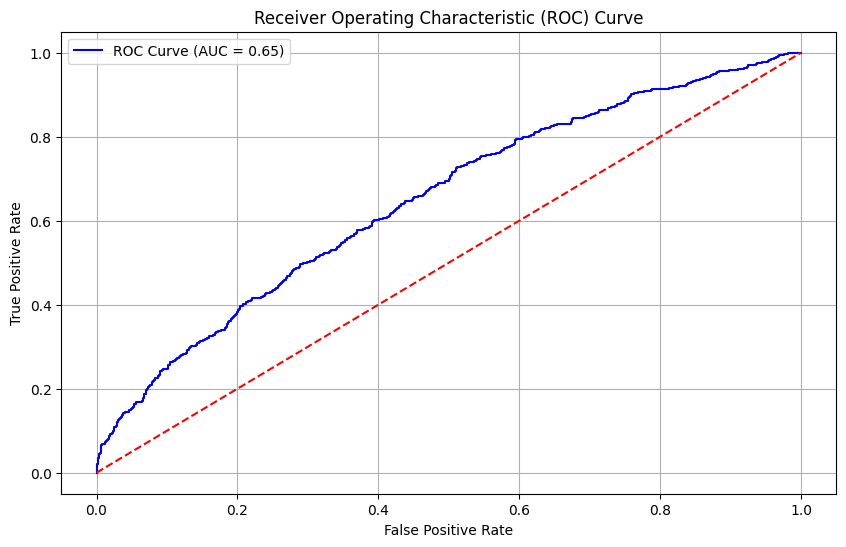

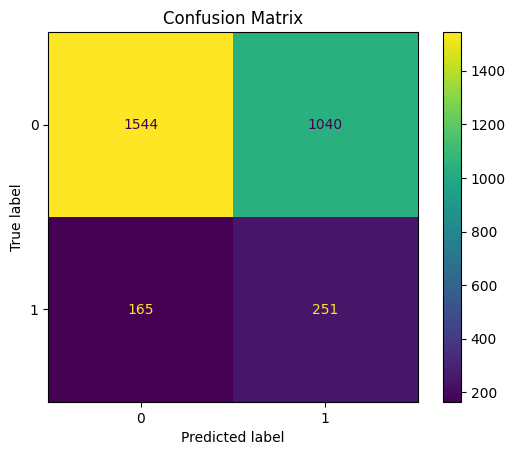

In [888]:
# Calculate ROC curve and AUC score (Example)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [889]:
## Create notes how I can interpret this for best business case + Include FEATURE ENGINEERING to infer my answer 